In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv(r"/Users/macbookpro/Desktop/laburo/Proyectos data analisys/bike sales/Sales.csv")

In [4]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [5]:
df.tail()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260
113035,2016-03-04,4,March,2016,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",23,24,64,655,552,1207


In [6]:
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [7]:
revenues_costs=df.groupby("Country").agg({"Revenue": "sum", "Cost": "sum"})
revenues_costs

,Revenue,Cost
Country,,
Australia,21302059,14526029
Canada,7935738,4218442
France,8432872,5552590
Germany,8978596,5618601
United Kingdom,10646196,6232343
United States,27975547,16901903


In [8]:
revenue_year=df.groupby("Year").agg({"Revenue":"sum"})
revenue_year

,Revenue
Year,
2011,8964888
2012,9175983
2013,15240037
2014,14152724
2015,20023991
2016,17713385


In [9]:
total_products=df.groupby("Product").agg({"Product":"count"}).rename(columns={"Product":"Total Products"}).sort_values("Total Products",ascending=False)
total_products

,Total Products
Product,
Water Bottle - 30 oz.,10794
Patch Kit/8 Patches,10416
Mountain Tire Tube,6816
AWC Logo Cap,4358
"Sport-100 Helmet, Red",4220
...,...
"Mountain-100 Silver, 48",58
"Mountain-100 Silver, 42",54
"Mountain-500 Silver, 48",40


In [10]:
gender_per_country=df.groupby(["Country","Customer_Gender"]).agg({"Customer_Gender":"count"}).rename(columns={"Customer_Gender":"Totals"})
gender_per_country

Totals
Country        Customer_Gender        
Australia      F                 11506
               M                 12430
Canada         F                  6496
               M                  7682
France         F                  5504
               M                  5494
Germany        F                  5572
               M                  5526
United Kingdom F                  6712
               M                  6908
United States  F                 18934
               M                 20272

<Axes: ylabel='Product'>

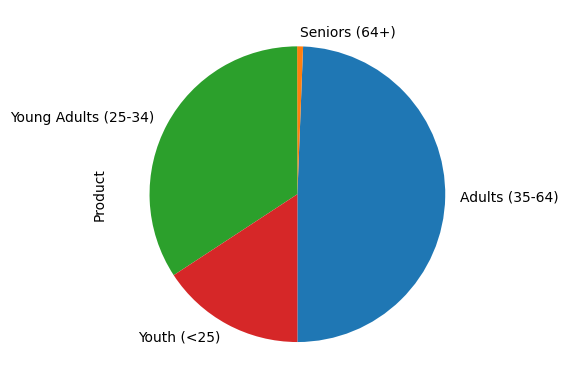

In [11]:
df.groupby('Age_Group')['Product'].count().plot(kind='pie',startangle=270)


<Axes: xlabel='Year'>

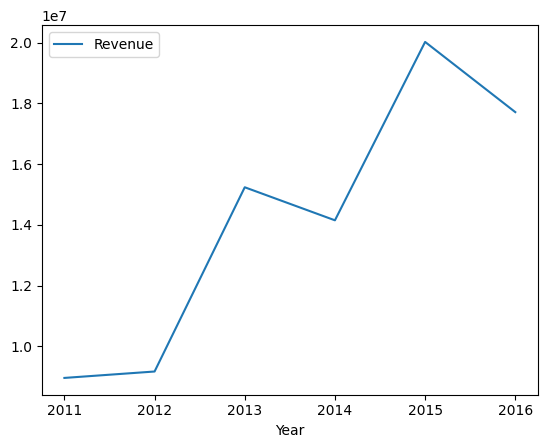

In [12]:
revenue_year.plot(kind='line')

<Axes: xlabel='Country'>

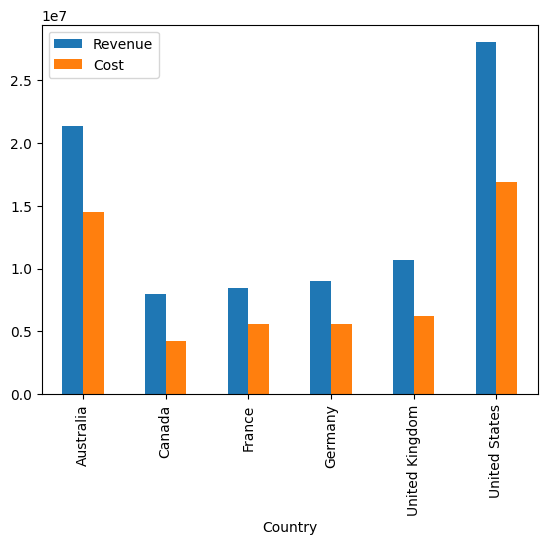

In [13]:
revenues_costs.plot(kind='bar')

<Axes: ylabel='Product'>

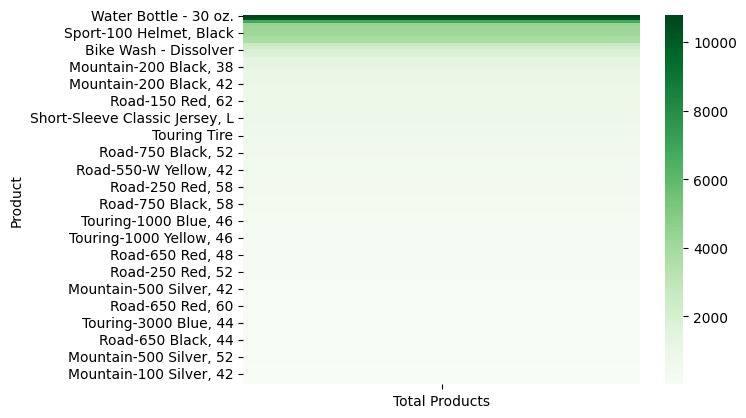

In [14]:
sns.heatmap(total_products,cmap="Greens")


<Axes: ylabel='Country,Customer_Gender'>

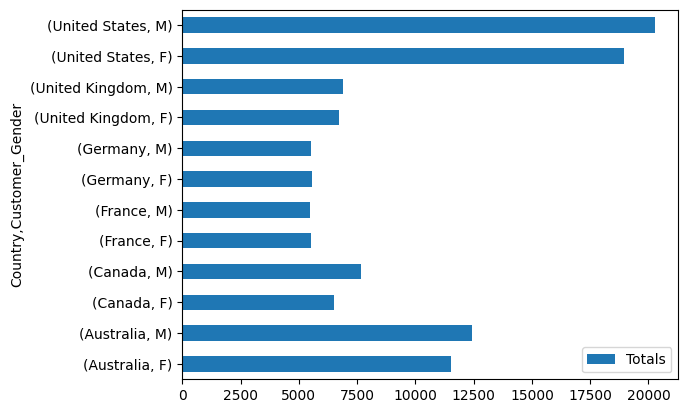

In [16]:
gender_per_country.plot(kind='barh')